In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import warnings
warnings.filterwarnings('ignore')

In [71]:
# Carregando a base
vestibular = pd.read_excel("vestibular.xlsx")

In [72]:
#Visualizando a base
vestibular.head()

,estudante,matematica,fisica,quimica
0,Gabriela,3.7,2.7,9.1
1,Luiz Felipe,7.8,8.0,1.5
2,Patricia,8.9,1.0,2.7
3,Ovidio,7.0,1.0,9.0
4,Leonor,3.4,2.0,5.0


Text(0.5, 0, 'quimica')

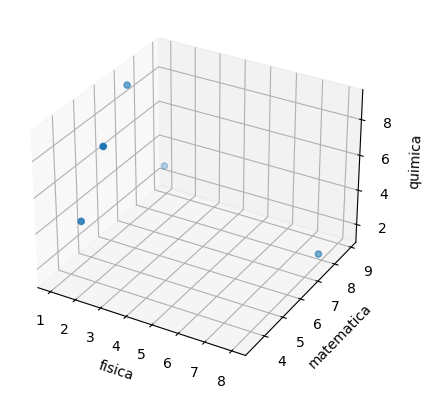

In [73]:
#Gráfico 3D
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(vestibular['fisica'],vestibular['matematica'],vestibular['quimica'])
ax.set_xlabel('fisica')
ax.set_ylabel('matematica')
ax.set_zlabel('quimica')

In [74]:
# Estatísticas descritivas
vestibular.describe()

,matematica,fisica,quimica
count,5.000000,5.000000,5.000000
mean,6.160000,2.940000,5.460000
std,2.478508,2.918561,3.510413
min,3.400000,1.000000,1.500000
25%,3.700000,1.000000,2.700000
50%,7.000000,2.000000,5.000000
75%,7.800000,2.700000,9.000000
max,8.900000,8.000000,9.100000


In [75]:
# Boxplots por variável
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Box(y=vestibular['matematica'], name='Matemática',
                marker_color = 'indianred'))
fig.add_trace(go.Box(y=vestibular['fisica'], name = 'Física',
                marker_color = 'lightseagreen'))
fig.add_trace(go.Box(y=vestibular['quimica'], name = 'Quimica',
                marker_color = 'darkblue'))

fig.show()

## Método Elbow

In [76]:
#Seleciona variáveis
selected_data = vestibular.iloc[:,1:]
max_clusters = vestibular['estudante'].nunique()

#Calcula as somas total dos quadrados de cada cluster
distortions = []
K = range(1,max_clusters)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(selected_data)
    distortions.append(kmeanModel.inertia_)

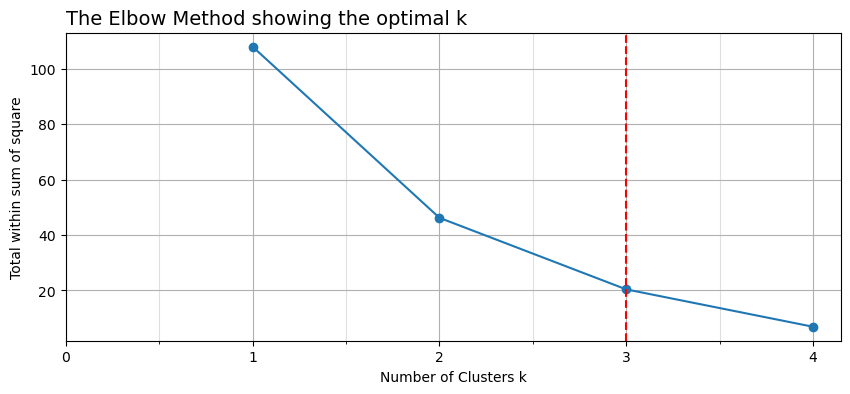

In [77]:
#Gráfico plotando Elbow
fig, ax = plt.subplots(figsize=(10,4))
plt.plot(K, distortions, marker='o')
plt.xlabel('Number of Clusters k')
plt.ylabel('Total within sum of square')
major_ticks = np.arange(0, 5, 1)
minor_ticks = np.arange(0, 4, 0.5)
ax.set_xticks(major_ticks)
ax.set_xticks(minor_ticks, minor=True)
ax.grid(which='both')
ax.grid(which='minor', alpha=0.4)
ax.grid(which='major', alpha=1)
plt.title('The Elbow Method showing the optimal k', fontdict={'fontsize':14}, loc='left')
plt.xlim(left=0)
plt.axvline(x=3, c='r',ls='--')
plt.show()

## Método K-Means

In [78]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=0).fit(selected_data)

In [79]:
#Array com classificação dos clusters
kmeans.labels_

array([0, 2, 1, 0, 0])

In [80]:
#Insere classificação na base
vestibular['cluster_K'] = kmeans.labels_

In [81]:
#Base com coluna dos Clusters K-Means
vestibular

,estudante,matematica,fisica,quimica,cluster_K
0,Gabriela,3.7,2.7,9.1,0
1,Luiz Felipe,7.8,8.0,1.5,2
2,Patricia,8.9,1.0,2.7,1
3,Ovidio,7.0,1.0,9.0,0
4,Leonor,3.4,2.0,5.0,0


### Análise de Variância de um Fator (ANOVA)

**Identidicar as Variáveis que mais ajudaram na formação dos clusters.**

- Mean Sq do Cluster_H: indica a variabilidade entre grupos
- Mean Sq dos Residuals: indica a variabilidade dentro dos grupos
- F Value: estatística de teste (Sum sq do Cluster_H / Sum Sq dos Resíduals)
- Pr(>F): p-valor da estatística
- p-valor < 0.05: rejeita-se H0 

>**H0:** A variável não é relevante para a separação dos clusters

>**H1:** A variável é relevante para a separação do Cluster

**Objetivo é comparar variabilidade entre os grupos e variabilidade dentro dos grupos** 

Variabilidade entre grupos tem que ser maior do que variabilidade dentro dos grupos, ou seja, os grupos devem ser diferentes entre si para formar clusters bem distintos.

**Estatística F:**
> Variabilidade entre grupos / variabilidade dentro do grupo

ou

> mean_sq (Cluster_H) / mean_sq (Residual)

**A variável mais discriminante dos grupos contém maior estatística F (e significativa: p-valor < 0.05)**

In [82]:
# Referência: https://www.reneshbedre.com/blog/anova.html
from bioinfokit.analys import stat

# ANOVA da variável 'matematica'
res = stat()
res.anova_stat(df=vestibular, res_var='matematica', anova_model='matematica ~ C(cluster_K)')
res.anova_summary

,df,sum_sq,mean_sq,F,PR(>F)
C(cluster_K),2.0,16.592,8.296,2.079198,0.32476
Residual,2.0,7.980,3.990,NaN,NaN


In [83]:
# ANOVA da variável 'fisica'
res = stat()
res.anova_stat(df=vestibular, res_var='fisica', anova_model='fisica ~ C(cluster_K)')
res.anova_summary

,df,sum_sq,mean_sq,F,PR(>F)
C(cluster_K),2.0,32.612,16.306,22.336986,0.04285
Residual,2.0,1.460,0.730,NaN,NaN


In [84]:
# ANOVA da variável 'quimica'
res = stat()
res.anova_stat(df=vestibular, res_var='quimica', anova_model='quimica ~ C(cluster_K)')
res.anova_summary

,df,sum_sq,mean_sq,F,PR(>F)
C(cluster_K),2.0,38.352,19.176,3.505667,0.221943
Residual,2.0,10.940,5.470,NaN,NaN
